In [3]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model


In [4]:
# 라벨 나누기
W = 300
H = 200

Label = ['Bus', 'Cargo truck', 'Motorcycle', 'Pickup truck', 'Sedan', 'Suv']
Label2 = ['Sedan', 'Suv']

In [5]:
# 모델 불러오기
model = load_model('model')
model.load_weights('model_weight.h5')

model2 = load_model('model2')
model2.load_weights('model2_weight.h5')

Found 150 images belonging to 6 classes.
 
 
 
-------- Predict -------
{'Bus': 0, 'Cargo truck': 1, 'Motorcycle': 2, 'Pickup truck': 3, 'Sedan': 4, 'Suv': 5}
answer :  [1.000 0.000 0.000 0.000 0.000 0.000]
정답 라벨 :  Bus
output :  [0.938 0.007 0.006 0.016 0.031 0.003]
예측 결과 :  Bus


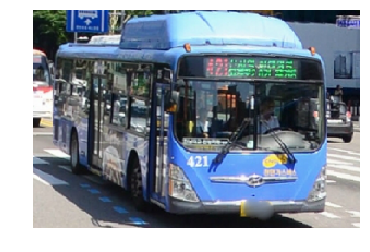

In [12]:
###########################################
# 모델 검증 
test_datagen = ImageDataGenerator(rescale=1./255)
test_path = 'dataset2/valid'
test_batches = test_datagen.flow_from_directory(test_path, target_size=(H,W),
                                                batch_size=150, class_mode='categorical', shuffle=False)
k = test_batches.class_indices

print(" ")
print(" ")
print(" ")
print("-------- Predict -------")
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
imgs, labels = next(test_batches)
imgs2 = imgs*255
    
output = model.predict(imgs)

# 예측 테스트 
num_of_img = 0
pd_ans = np.argmax(output[num_of_img])
pd_ans = Label[pd_ans]

counter = 0
if (pd_ans == 'Sedan') | (pd_ans == 'Suv'):
    output2 = model2.predict(imgs)
    pd_ans2 = np.argmax(output2[num_of_img])
    pd_ans = Label2[pd_ans2]
    counter += 1

js = [0]
for j in js:
    ims = imgs2[j]
    lb = labels[j]
    pd = output[j]

    ims = np.array(ims).astype(np.uint8)
    plt.imshow(ims)
    plt.axis('off')

    lb_ans = np.argmax(lb)
    lb_ans = Label[lb_ans]
    
    print(k)
    print('answer : ', lb)
    print('정답 라벨 : ', lb_ans)
    print('output : ', output[num_of_img])
    print('예측 결과 : ', pd_ans)


In [8]:
tt2=[]
for i in range(150):
    argmax = np.argmax(labels[i])
    tt2.append(argmax)
print('정답 라벨')
print(tt2[0:25])
print(tt2[25:50])
print(tt2[50:75])
print(tt2[75:100])
print(tt2[100:125])
print(tt2[125:150])

정답 라벨
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [7]:
# 1번 모델 결과
tt=[]
for i in range(150):
    argmax = np.argmax(output[i])
    tt.append(argmax)
p=list(k.items())
print('1차 결과')
print(tt[0:25], p[0])
print(tt[25:50], p[1])
print(tt[50:75], p[2])
print(tt[75:100], p[3])
print(tt[100:125], p[4])
print(tt[125:150], p[5])

1차 결과
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] ('Bus', 0)
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ('Cargo truck', 1)
[2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] ('Motorcycle', 2)
[3, 3, 3, 3, 3, 3, 3, 5, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3] ('Pickup truck', 3)
[5, 5, 5, 5, 5, 3, 5, 5, 5, 2, 5, 4, 4, 5, 5, 5, 4, 4, 5, 4, 5, 5, 4, 4, 5] ('Sedan', 4)
[4, 4, 3, 3, 5, 5, 5, 3, 4, 5, 5, 5, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] ('Suv', 5)


In [9]:
# 정확도 계산
accuracy_sum = 0
for i in range(150):
    if tt[i] == tt2[i]:
        accuracy_sum += 1
print(accuracy_sum)
accuracy = (accuracy_sum/150)*100
print(accuracy, '%')

121
80.66666666666666 %


In [13]:
# 2번 모델 추가 결과
output2 = model2.predict(imgs[100:150])

ttr=[]
for i in range(50):
    argmax = np.argmax(output2[i])
    ttr.append(argmax)

for i in range(50):
    if (tt[i+100] == 4) | (tt[i+100] == 5):
        if (ttr[i] == 0):
            tt[i+100] = 4
        else :
            tt[i+100] = 5
p=list(k.items())
print('2차 결과')
print(tt[0:25], p[0])
print(tt[25:50], p[1])
print(tt[50:75], p[2])
print(tt[75:100], p[3])
print(tt[100:125], p[4])
print(tt[125:150], p[5])

2차 결과
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] ('Bus', 0)
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ('Cargo truck', 1)
[2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] ('Motorcycle', 2)
[3, 3, 3, 3, 3, 3, 3, 5, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3] ('Pickup truck', 3)
[4, 4, 4, 4, 4, 3, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4] ('Sedan', 4)
[5, 4, 3, 3, 5, 4, 5, 3, 4, 5, 5, 5, 3, 3, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5] ('Suv', 5)


In [14]:
# 정확도 계산
accuracy_sum = 0
for i in range(150):
    if tt[i] == tt2[i]:
        accuracy_sum += 1
print(accuracy_sum)
accuracy = (accuracy_sum/150)*100
print(accuracy, '%')

136
90.66666666666666 %
